In [2]:
from micrograd.micrograd.engine import Value
from scripts.draw_utils import (
    draw_dot,
    fix_axes_style,
    COLOR_PINK,
    COLOR_VIOLET,
    COLOR_BLUE,
    COLOR_GREEN
)
import numpy as np
import os
import matplotlib.pyplot as plt

Глобальные настройки шрифтов посеттил


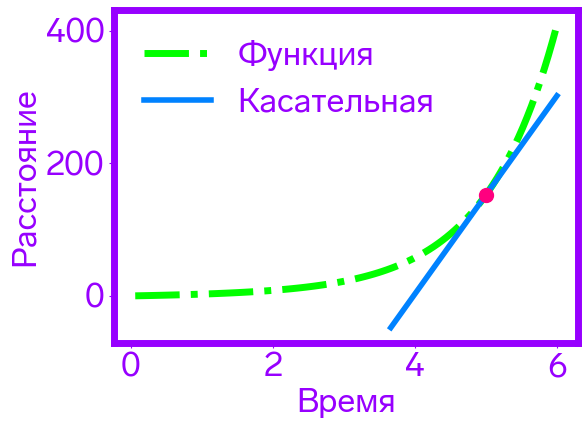

In [3]:
def f(x):
    return x + np.e**x - 1


def df_dx(x):
    return 1 + np.e**x


xs = np.linspace(0, 6, 101)[1:]
ax = plt.gca()


ax.plot(xs, f(xs), c=COLOR_GREEN, lw=5, ls="-.", label="Функция")
ax.plot(
    xs[60:],
    f(5) + (xs[60:] - 5) * df_dx(5),
    c=COLOR_BLUE,
    lw=4,
    alpha=1.0,
    label="Касательная",
)

ax.scatter(5, f(5), c=COLOR_PINK, zorder=2,s=100)

ax.set_xlabel("Время")
ax.set_ylabel("Расстояние")
ax.legend()
fix_axes_style(ax)
plt.legend(framealpha=0.0)
plt.tight_layout()
plt.savefig("pics/derivative_1.svg", transparent=True)
plt.show()

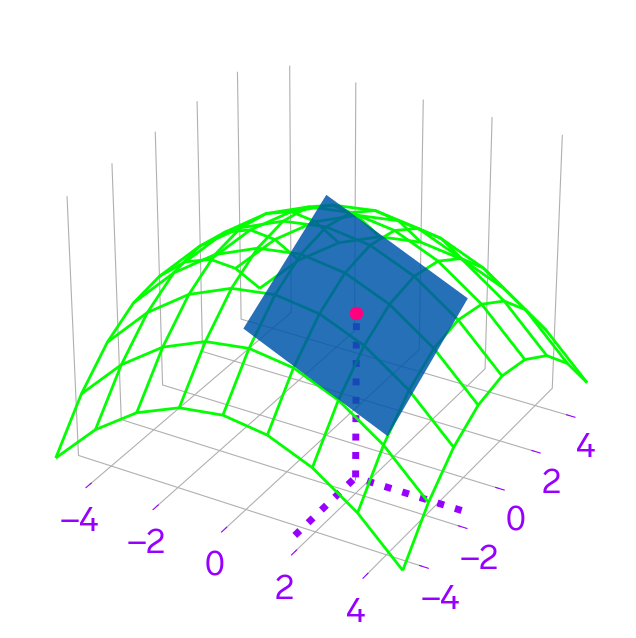

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Necessary for 3D plotting


# 1. Define the function z = f(x, y)
def f(x, y):
    return -(x**2 + y**2)


# 2. Create a meshgrid for x and y
x = np.linspace(-5, 5, 9)  # 50 points from -5 to 5
y = np.linspace(-5, 5, 9)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# 3. Choose the point (x0, y0) where you want the tangent plane
x0 = 2
y0 = -2
z0 = f(x0, y0)

# 4. Calculate partial derivatives at (x0, y0)
# For z = x^2 + y^2, the partial derivatives are:
# ∂z/∂x = 2x and ∂z/∂y = 2y
fx = -2 * x0
fy = -2 * y0

# 5. Define the tangent plane
# z = z0 + fx*(x - x0) + fy*(y - y0)
# We'll compute the tangent plane over a small grid around (x0, y0)
x_tangent = np.linspace(x0 - 2, x0 + 2, 2)
y_tangent = np.linspace(y0 - 2, y0 + 2, 2)
X_tan, Y_tan = np.meshgrid(x_tangent, y_tangent)
Z_tan = z0 + fx * (X_tan - x0) + fy * (Y_tan - y0)

# 6. Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d",computed_zorder=False)

# Plot the 3D wireframe surface
ax.plot_wireframe(
    X, Y, Z, rstride=1, cstride=1, color=COLOR_GREEN, alpha=1, lw=2, label="Surface", zorder=1
)

# Plot the tangent plane
ax.plot_surface(X_tan, Y_tan, Z_tan, color=COLOR_BLUE, alpha=0.85, zorder=2)

# Highlight the point on the surface
ax.plot([x0, x0], [y0, y0], zs=[Z.min(), z0], color=COLOR_VIOLET, ls=":", lw=5, zorder=0)
ax.plot([x0, x0], [-5, y0], zs=[Z.min(), Z.min()], color=COLOR_VIOLET, ls=":", lw=5, zorder=0)
ax.plot([5, x0], [y0, y0], zs=[Z.min(), Z.min()], color=COLOR_VIOLET, ls=":", lw=5, zorder=0)
ax.scatter([x0], [y0], zs=[z0], zorder=3, c=COLOR_PINK,s=75)
ax.set_zticks([])
fix_axes_style(ax)


ax.xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

# Transparent panes
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.set_xlim((-5, 5))
ax.set_ylim((-5, 5))


plt.savefig("pics/derivative_2.svg", transparent=True)
plt.show()

In [5]:
data_xs = np.linspace(0, 1, 5)
data_ys = data_xs + np.random.rand(len(data_xs)) * 0.75

In [6]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(copy_X=True, fit_intercept=True)
reg.fit(data_xs[:, np.newaxis], data_ys)
reg.coef_, reg.intercept_

(array([1.21143973]), 0.27755179213075665)

/tmp/ipykernel_5730/4113912833.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/tmp/ipykernel_5730/4113912833.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(framealpha=0.0)


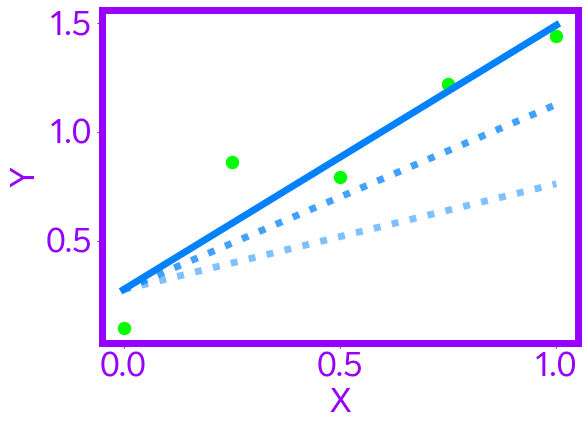

In [7]:
ax = plt.gca()

ax.scatter(data_xs, data_ys, c=COLOR_GREEN, s=75)
ax.plot(
    data_xs,
    data_xs * reg.coef_ * 0.4 + reg.intercept_,
    c=COLOR_BLUE,
    lw=5,
    alpha=0.5,
    ls=":",
)
ax.plot(
    data_xs,
    data_xs * reg.coef_ * 0.7 + reg.intercept_,
    c=COLOR_BLUE,
    lw=5,
    alpha=0.75,
    ls=":",
)
ax.plot(
    data_xs,
    data_xs * reg.coef_ + reg.intercept_,
    c=COLOR_BLUE,
    lw=5,
    alpha=1.0,
)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.legend()
fix_axes_style(ax)
plt.legend(framealpha=0.0)
plt.tight_layout()
plt.savefig("pics/derivative_3.svg", transparent=True)
plt.show()

/tmp/ipykernel_5730/445600306.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/tmp/ipykernel_5730/445600306.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(framealpha=0.0)


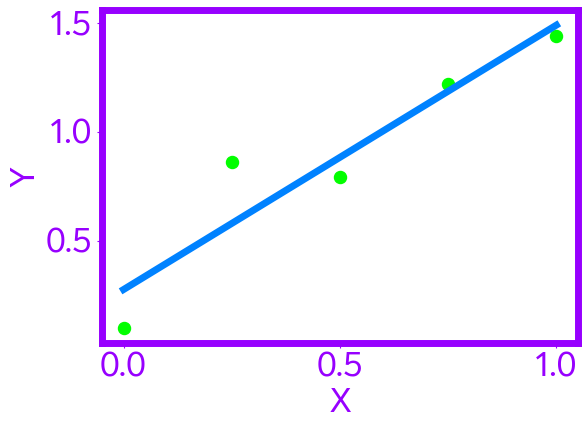

In [8]:
ax = plt.gca()

ax.scatter(data_xs, data_ys, c=COLOR_GREEN, s=75)

ax.plot(
    data_xs,
    data_xs * reg.coef_ + reg.intercept_,
    c=COLOR_BLUE,
    lw=5,
    alpha=1.0,
)


def get_nearest(x, y, reg):
    a, b, c = -1, reg.coef_, reg.intercept_
    res_x = (b * (b * x - a * y) - a * c) / (a**2 + b**2)
    res_y = (a * (-b * x + a * y) - b * c) / (a**2 + b**2)
    return res_x, res_y


ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.legend()
fix_axes_style(ax)
plt.legend(framealpha=0.0)
plt.tight_layout()
plt.savefig("pics/derivative_4.svg", transparent=True)
plt.show()

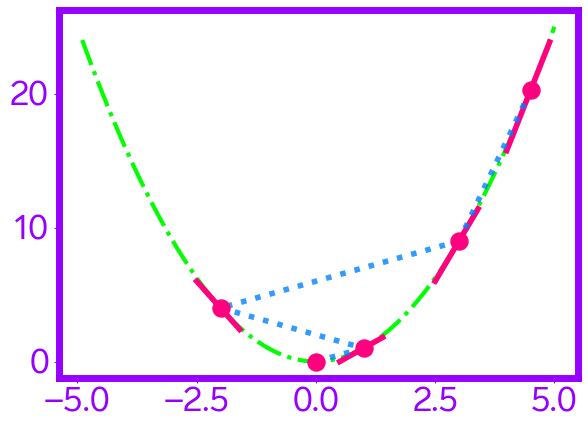

In [9]:
def f(x):
    return x ** 2


def df_dx(x):
    return 2 * x

def draw_point_and_tangent(x, f, df_dx, xs, ax, x_range=5):
    nearest_idx = np.abs((xs - x)).argmin()
    x = xs[nearest_idx]
    ax.scatter([x], [f(x)], s=150, c=COLOR_PINK, zorder=3)
    ax.plot(
        xs[nearest_idx-x_range:nearest_idx+x_range],
        f(x) + (xs[nearest_idx-x_range:nearest_idx+x_range] - x) * df_dx(x),
        c=COLOR_PINK,
        lw=4,
        ls='-',
        alpha=1.0,
        label="Касательная",
    )

def draw_dots(x0,y0, x1,y1):
    ax.plot(
        [x0, x1],
        [y0, y1],
        c=COLOR_BLUE,
        lw=4,
        ls=':',
        alpha=0.8,
    )

xs = np.linspace(-5, 5, 101)[1:]
ax = plt.gca()


ax.plot(xs, f(xs), c=COLOR_GREEN, lw=3, ls="-.", label="Функция")


draw_point_and_tangent(4.5,f,df_dx,xs,ax,x_range=5)
draw_point_and_tangent(3,f,df_dx,xs,ax,x_range=5)
draw_point_and_tangent(-2,f,df_dx,xs,ax,x_range=5)
draw_point_and_tangent(1,f,df_dx,xs,ax,x_range=5)
draw_point_and_tangent(0,f,df_dx,xs,ax,x_range=0)
draw_dots(4.5, f(4.5), 3, f(3))
draw_dots(3, f(3), -2, f(-2))
draw_dots(-2, f(-2), 1, f(1))
draw_dots(1, f(1), 0, f(0))

fix_axes_style(ax)
plt.tight_layout()
plt.savefig("pics/derivative_5.svg", transparent=True)
plt.show()

In [10]:
a = Value(4,'a', show_grads=True)
b = Value(4,'b', show_grads=True)
x0,x1 = data_xs[1:3]
y0,y1 = data_ys[1:3]
x0 = Value(x0, 'x0')
x1 = Value(x1, 'x1')
y0 = Value(y0, 'y0')
y1 = Value(y1, 'y1')

aa = a*x0 + b
aa.label = f'({aa.label})'
bb = a*x1 + b
bb.label = f'({bb.label})'
L = (y0 - aa)**2 + (y1 - bb)**2
L.label = "L"
L.backward()

sub
sub


'pics/graph_1.svg'

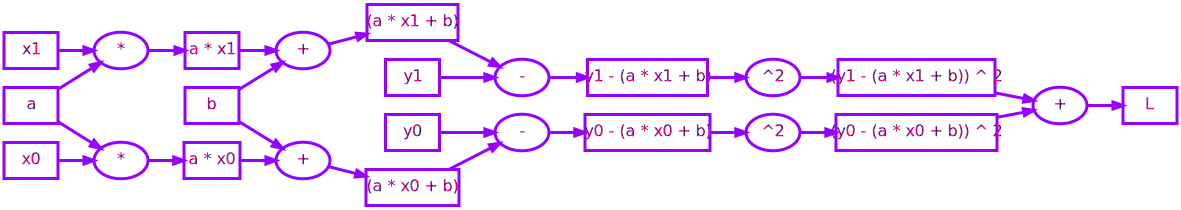

In [11]:

draw_dot(L,show_data=False, show_grad=False).render('pics/graph_1', format='svg')
draw_dot(L,show_data=False, show_grad=False)